In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

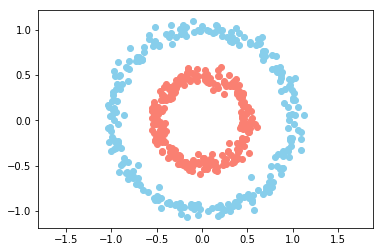

In [2]:
# CREAR EL DATASET

n = 500
p = 2
# ENTRÉGANOS LOS INPUT AND OUTPUT
# makecircles(número de ejemplos, distancia entre círculos, ruido en los datos(variabilidad))
X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)

# De tal forma que Y = (500,1), solo se añade un nueva dimensión
Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c = "skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c = "salmon")
#Hacemos que los ejes se vean de la misma proporción
plt.axis("equal")
plt.show()

In [3]:
# CLASE DE LA CAPA DE LA RED
#La clase que se refiere a una capa de la red neuronal
class neural_layer():
    #Inicializador de la clase
    #Inicialiamos la capa ({self} es como this[java], números de conexiones que entran de la capa anterior, números de nueronas de esta capa, función de activación de la capa)
    def __init__(self, n_conn, n_neur, act_f):
        #La función de activación de esta capa será la que enviemos de la anterior
        self.act_f = act_f
        #Parámetros de bayas que son tantos como neuronas tengamos en la capa
        # inicia como [1,0,1,1,...] entre 1 y lo queremos entre [-1,1] así que realizmos ([])*2-1
        self.b = np.random.rand(1, n_neur) * 2 - 1
        #Lo mismo para la matriz W, Recordemos que entre dos capas tenemos tantas conexiones como números de neuronas tenermos en la capa anterior y n de neuronas tenemos en la capa actual
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1
        

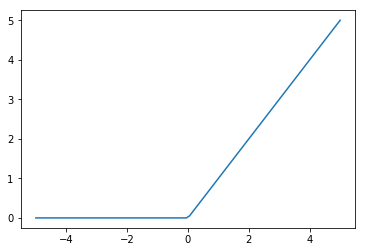

In [4]:
# CREAMOS LA FUNCIÓN DE ACTIVACIÓN
#
sigm = (lambda x: 1 / (1 + np.e**(-x)),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)

plt.plot(_x,relu(_x))

In [5]:
# CREACIÓN DE CAPAS
#l0 = neural_layer(p, 4, sigm)
#l1 = neural_layer(4, 8, sigm)
# etc...

# LO HAREMOS ITERATIVAMENTE

#definimos create_neuralNetwork(+topology,+action_function)
def create_nn(topology, act_f):
    #Creamos el nueral network
    nn = []
    #iteramos con for y l obtendrá el índice y layer el objeto hasta el último objeto {[:-1]}
    for l,layer in enumerate(topology[:-1]):
        #lo agregamos a el vector nn un objeto de la calse neural_layer
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    #retornamos el array.
    return nn
# PROBAMOS
#create_nn(topology, sigm)

In [6]:
# ENTRENAREMOS LA RED

# Creamos el vector de la topología de la red.
topology = [p, 4 , 8, 1]

#Creamos la red
neural_net = create_nn(topology, sigm)

#Función anónima del error cuadrático medio
l2_cost = (lambda Yp, Yr: np.mean((Yp- Yr) ** 2),
          lambda Yp, Yr: (Yp-Yr))
"""Una red nueronal posee tres grandes cosas.
    1. Un paso adelante
    2. Pasee hacia atrás (Backpropagation)
    3. Descenso de gradiente (optimization)"""
#Definimos la función de entrenamiento
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    #Definimos un vector que tenga los outputs iterativos
    #Lo inicializamos con el conjunto de datos X
    out = [(None, X)]
    
    # Forward pass
    for l, layer in enumerate(neural_net):
        #ejecutamos la función de coste
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        #ejecutamos la función de activación a la función de coste
        a = neural_net[l].act_f[0](z)
        #agregamos a el output los nuevos valores de coste
        out.append((z,a))
    #Si el entrenamiento está activado
    if train:
    
        # Backward pass 
        #vector de todas las deltas que calculemos
        deltas = []
        #iteración hacía atrás desde la longitud del vector hasta cero
        for l in reversed(range(0, len(neural_net))):
            #función z de nuestra actual capa {l+1}
            z = out[l+1][0]
            #función de activación de nuestra capa actual {l+1}
            a = out[l+1][1]
            #si estamos en la última capa
            if l == len(neural_net) - 1:
                #calcular delta de la última capa
                #deltas.insert(0, ....) te agrega el resultado al primer indice
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            #en cualquier otro caso
            else:
                #calcular delta respecto a capa previa
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
            #guardar el vector de pesos W de la capa siguiente 
            _W = neural_net[l].W

            # Gradient descent
            #Algoritmo de bayas
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
            #Parámetro W
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
    #retornar el valor predicho   
    return out[-1][1]
    

train(neural_net, X, Y, l2_cost, 0.5)
print("")

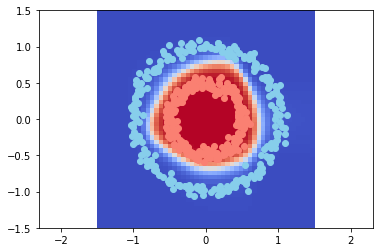

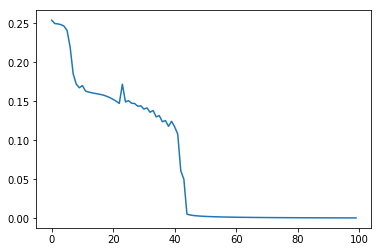

In [11]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

#Vector de costes en el tiempo para graficarlos
loss = []

for i in range(2500):
    
    # Entrenemos a la red!
    pY = train(neural_n, X, Y, l2_cost, lr=0.05)
    
    #cada 25 iteraciones hacemos:
    if i % 25 == 0:
        
        print(pY)
        #guardamos en el vector de costes
        loss.append(l2_cost[0](pY, Y))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            
            for i1, x1 in enumerate(_x1):
                #Hacemos una predicción
                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    
        #### Dibujar en la nube de datos
        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")

        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
        ### Dibujar y limpiar el gráfico de pesos
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5) 

In [12]:
plt.pcolormesh?
